#Student Data


This notebook analyzes pass/fail data for a class

In [10]:
data = [20,20,40,30,60,70,80,50,60,20,10,50]
print(data * 2)

[20, 20, 40, 30, 60, 70, 80, 50, 60, 20, 10, 50, 20, 20, 40, 30, 60, 70, 80, 50, 60, 20, 10, 50]


In [14]:
import numpy as np

grades = np.array(data)

print(grades)

[20 20 40 30 60 70 80 50 60 20 10 50]


In [15]:
grades.shape

(12,)

In [16]:
grades.mean()

42.5

In [17]:
study_hour = [10.0, 11.5, 8.5, 5.5, 4.8, 7.6, 6.3, 9.3, 6.2, 7.1, 8.3, 9.0]

student_data = np.array([study_hour, grades])

In [22]:
student_data[0][1]

11.5

In [27]:
avgStudy = student_data[0].mean()
avgGrade = student_data[1].mean()

print(f"average study = {avgStudy}\naverage grade = {avgGrade}")

average study = 7.841666666666666
average grade = 42.5


In [30]:
import pandas as pd

students = pd.DataFrame({'Name':['Alan', 'John', 'David', 'Melody', 'Claire','Caydence','June','Joe', 'Tim', 'Matt', 'James', 'Sam'], 'Study Hours':student_data[0],'Grade':student_data[1]})

students

,Name,Study Hours,Grade
0,Alan,10.0,20.0
1,John,11.5,20.0
2,David,8.5,40.0
3,Melody,5.5,30.0
4,Claire,4.8,60.0
5,Caydence,7.6,70.0
6,June,6.3,80.0
7,Joe,9.3,50.0
8,Tim,6.2,60.0
9,Matt,7.1,20.0


In [36]:
students.loc[5, 'Name']

'Caydence'

In [39]:
students[students['Name']=='Caydence']

,Name,Study Hours,Grade
5,Caydence,7.6,70.0


In [41]:
students.query('Name=="Caydence"')

,Name,Study Hours,Grade
5,Caydence,7.6,70.0


In [42]:
students[students.Name=="Caydence"]

,Name,Study Hours,Grade
5,Caydence,7.6,70.0


In [104]:
students = pd.read_csv('grades.csv', delimiter=',',header='infer')

In [54]:
students.isnull().sum()

Name          0
Studyhours    1
Grade         1
dtype: int64

In [55]:
students.Studyhours = students.Studyhours.fillna(students.Studyhours.mean())

In [56]:
students = students.dropna(axis=0)

In [105]:
mean_study = students['Studyhours'].mean()

mean_grade = students['Grade'].mean()

print(f'Average weekly study hours: {mean_study}\naAverage grade: {mean_grade}')

Average weekly study hours: 6.161538461538461
aAverage grade: 56.69230769230769


In [94]:
students[students.Studyhours > mean_study]

,Name,Studyhours,Grade
0,Alan,11.0,70
4,James,12.0,60
9,Melody,8.5,89


In [108]:
students[students.Studyhours > mean_study].Grade.mean()

59.0

In [106]:
passed = pd.Series(students.Grade >= 50)
students = pd.concat([students, passed.rename('Passed')], axis=1)

In [107]:
students.groupby(students.Passed).Name.count()

Passed
False     2
True     11
Name: Name, dtype: int64

In [101]:
del students['Passed']

In [109]:
students.groupby(students.Passed)['Studyhours','Grade'].mean()

C:\Users\tham\AppData\Local\Temp\ipykernel_10296\2153514770.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  students.groupby(students.Passed)['Studyhours','Grade'].mean()


,Studyhours,Grade
Passed,,
False,5.850000,20.000000
True,6.218182,63.363636


In [110]:
students = students.sort_values('Studyhours', ascending=False)

C:\Users\tham\AppData\Local\Temp\ipykernel_10296\3378925924.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(students.Name, rotation=90)
C:\Users\tham\AppData\Local\Temp\ipykernel_10296\3378925924.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


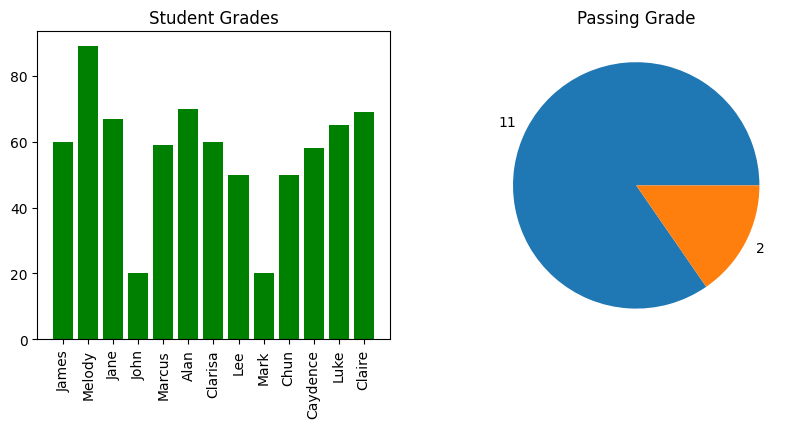

In [125]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].bar(x=students.Name, height=students.Grade, color="green")

ax[0].set_title("Student Grades")
ax[0].set_xticklabels(students.Name, rotation=90)

passes_count = students.Passed.value_counts()
ax[1].pie(passes_count, labels = passes_count)
ax[1].set_title("Passing Grade")

fig.show()

<AxesSubplot: xlabel='Name'>

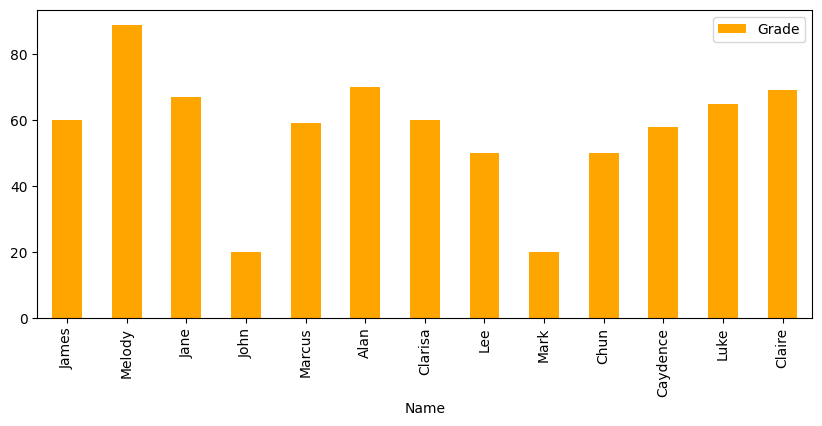

In [130]:
students.plot.bar(x='Name',y='Grade', figsize=(10,4), color='orange')

min: 20 
max: 89 
mean: 56.69230769230769 
median: 60.0 
mode: 20


C:\Users\tham\AppData\Local\Temp\ipykernel_10296\1144221869.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels("Value")
C:\Users\tham\AppData\Local\Temp\ipykernel_10296\1144221869.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


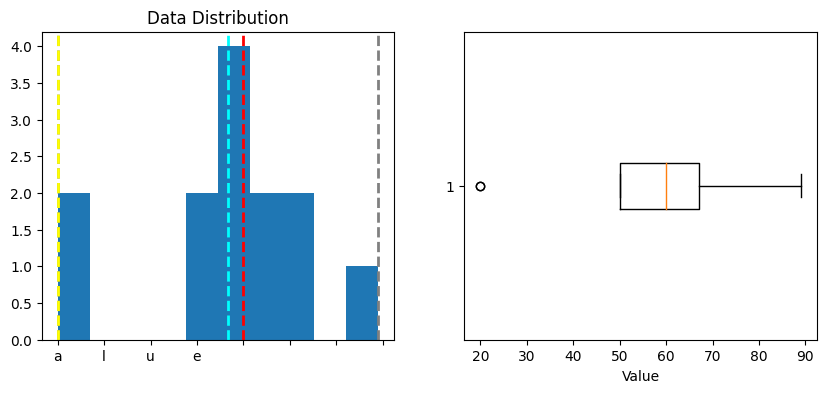

In [142]:
grades = students.Grade

min_val = students.Grade.min()
max_val = students.Grade.max()
mean_val = students.Grade.mean()
median_val = students.Grade.median()
mode_val = students.Grade.mode()[0]

print(f"min: {min_val} \nmax: {max_val} \nmean: {mean_val} \nmedian: {median_val} \nmode: {mode_val}")

fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].hist(grades)

ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)
ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
ax[0].axvline(x=median_val, color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(x=mode_val, color='yellow', linestyle='dashed', linewidth=2)

ax[0].set_title("Data Distribution")
ax[0].set_xticklabels("Value")
#plt.ylabel("Frequency")

ax[1].boxplot(grades, vert=False)
ax[1].set_xlabel("Value")

fig.show()

C:\Users\tham\AppData\Local\Temp\ipykernel_10296\769747515.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


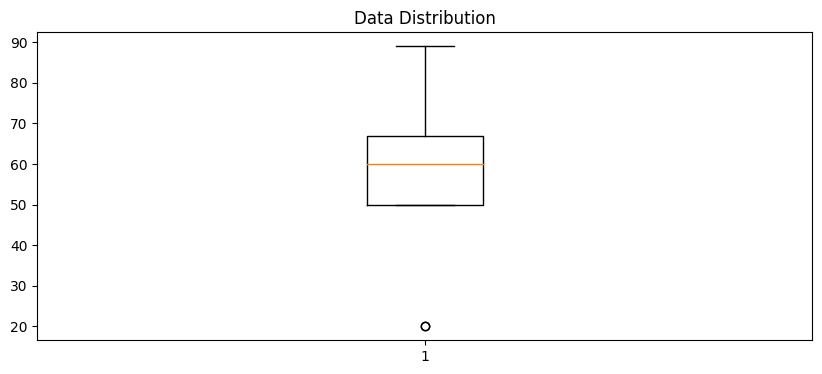

In [133]:
grades = students.Grade

fig = plt.figure(figsize=(10,4))

plt.boxplot(grades)

plt.title("Data Distribution")

fig.show()

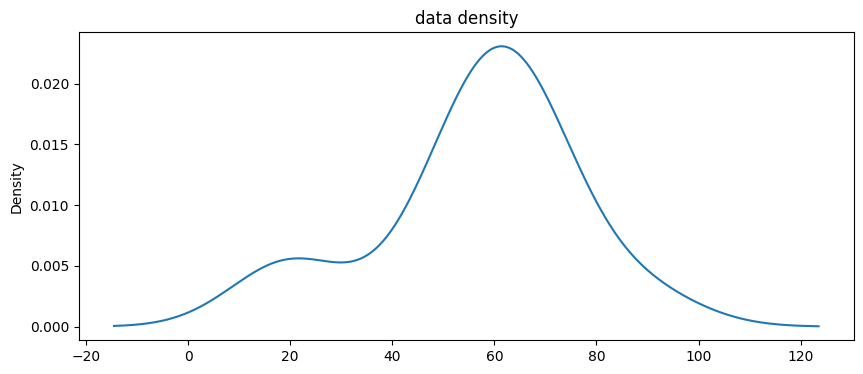

In [148]:
def show_density(data):
    fig = plt.figure(figsize=(10,4))

    data.plot.density()

    plt.title("data density")

    plt.show()

show_density(students.Grade)

In [152]:
import math
mean = students.Studyhours.mean()
variance = 0

for hours in students.Studyhours:
    variance = variance + ((mean - hours)**2)

variance = variance / students.shape[0]

variance

std = math.sqrt(variance)

std

2.067156523990033

In [157]:
for col_name in ["Grade",'Studyhours']:
    col = students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print(f'\n{col_name}:\n - Range: {rng}\n - Variance: {var}\n - Std.Dev: {std}')


Grade:
 - Range: 69
 - Variance: 363.2307692307693
 - Std.Dev: 19.05861404275687

Studyhours:
 - Range: 8.8
 - Variance: 4.629230769230769
 - Std.Dev: 2.1515647257823245


In [164]:
print(f"68% of grades will fall between {students.Grade.mean() - students.Grade.std()} and {students.Grade.mean() + students.Grade.std()}")

68% of grades will fall between 37.63369364955082 and 75.75092173506457


In [165]:
students.describe()

,Studyhours,Grade
count,13.000000,13.000000
mean,6.161538,56.692308
std,2.151565,19.058614
min,3.200000,20.000000
25%,5.200000,50.000000
50%,5.800000,60.000000
75%,6.400000,67.000000
max,12.000000,89.000000


In [166]:
df_sample = students[students.Studyhours>1]

df_sample

,Name,Studyhours,Grade,Passed
4,James,12.0,60,True
9,Melody,8.5,89,True
5,Jane,6.5,67,True
2,John,6.4,20,False
12,Marcus,6.3,59,True
0,Alan,6.0,70,True
7,Clarisa,5.8,60,True
11,Lee,5.5,50,True
3,Mark,5.3,20,False
1,Chun,5.2,50,True


<AxesSubplot: title={'center': 'Studyhours'}, xlabel='Passed'>

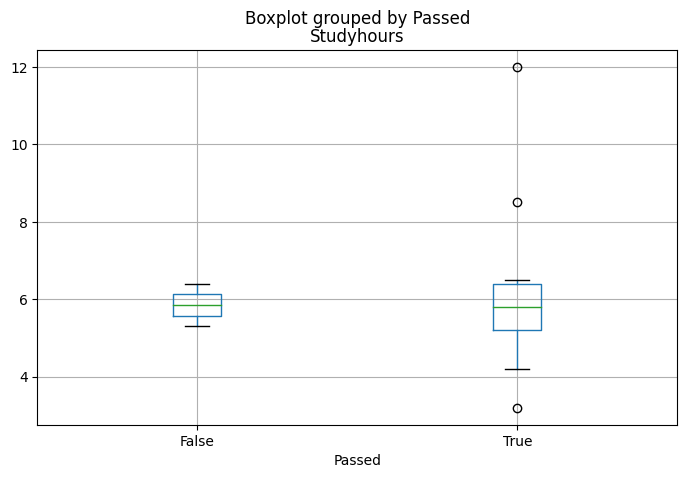

In [170]:
df_sample.boxplot(column='Studyhours', by='Passed', figsize=(8,5))

<AxesSubplot: xlabel='Name'>

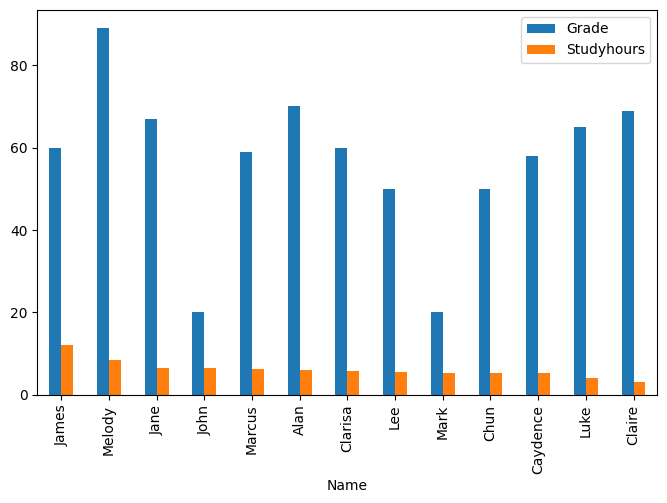

In [171]:
df_sample.plot(x='Name', y=['Grade','Studyhours'], kind='bar', figsize=(8,5))

<AxesSubplot: xlabel='Name'>

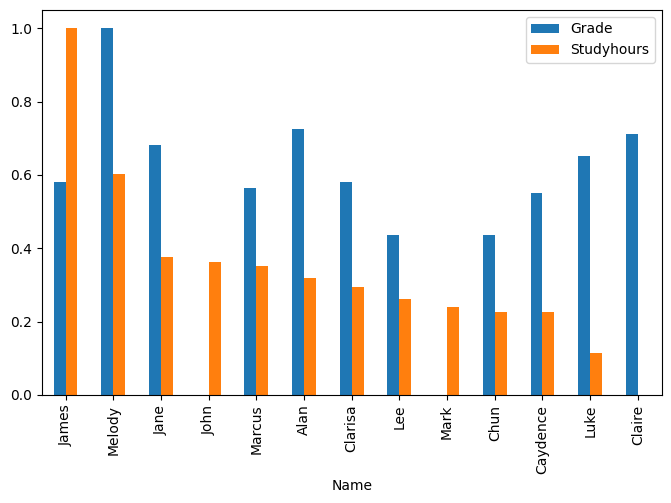

In [174]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = df_sample[['Name', 'Grade','Studyhours']].copy()

df_normalized[['Grade','Studyhours']] = scaler.fit_transform(df_normalized[['Grade','Studyhours']])

df_normalized.plot(x='Name', y=['Grade','Studyhours'], kind='bar', figsize=(8,5))

In [175]:
df_normalized.Grade.corr(df_normalized.Studyhours)

0.15251110317655414

<AxesSubplot: title={'center': 'Study Time vs Grade'}, xlabel='Studyhours', ylabel='Grade'>

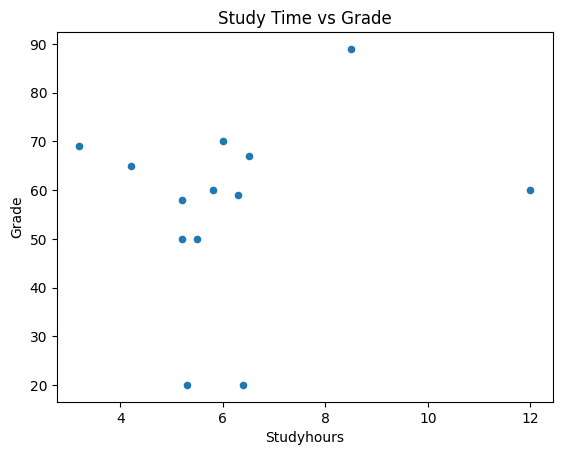

In [176]:
df_sample.plot.scatter(title='Study Time vs Grade', x='Studyhours', y='Grade')

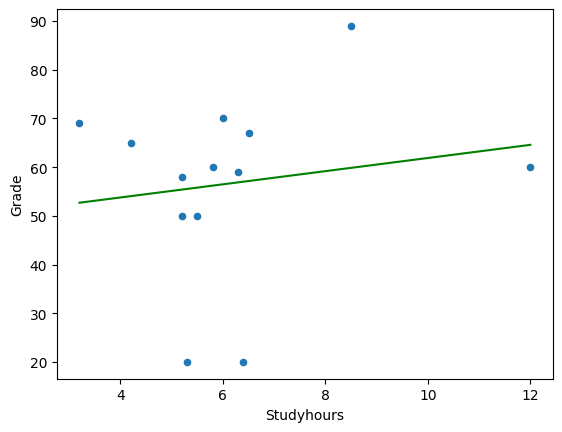

1.3509471585244266 48.368394815553344


In [180]:
from scipy import stats
df_regression = df_sample[['Grade', 'Studyhours']].copy()

m, b, r, p, se = stats.linregress(df_regression['Studyhours'], df_regression['Grade'])

df_regression['fx'] = (m * df_regression['Studyhours']) + b

df_regression['error'] = df_regression['fx'] - df_regression['Grade']

df_regression.plot.scatter(x='Studyhours', y='Grade')

plt.plot(df_regression['Studyhours'], df_regression['fx'], color='green')

plt.show()

print(m, b)

In [184]:
def predict(x):
    m = 1.3509471585244266
    b = 48.368394815553344
    return m*x + b

prediction = predict(18)

prediction

72.68544366899303